# AirBnb case study

For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

- Which type of hosts to acquire more and where?
- The categorisation of customers based on their preferences.
- What are the neighbourhoods they need to target?
- What is the pricing ranges preferred by customers?
- The various kinds of properties that exist w.r.t. customer preferences.
- Adjustments in the existing properties to make it more customer-oriented.
- What are the most popular localities and properties in New York currently?
- How to get unpopular properties more traction? and so on...

To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York. Based on this analysis, you need to give two presentations to the following groups:
- 1.Data Analysis Managers and Lead Data Analyst
- 2.Head of Acquisitions and Operations, NYC and Head of User Experience, NYC.


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread### Hosts with most number of listings in NYC(on the basis of host listings count)


In [4]:
# Read AB_NYC_2019.csv file
df_airbnb= pd.read_csv('AB_NYC_2019.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Exploration of data

In [5]:
# Variable check
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Checking id all property id's are different
df_airbnb['id'].nunique()

48895

### Numerical and Categorical variables

In the basic inspection every property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

Hence, host_name is a categorical variable and neighbourhood_group,neighbourhood and room_type also fall into this category.

While columns id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are all numerical variables

In [8]:
# checking unique values for host_name
df_airbnb['host_name'].nunique()

11452

In [9]:
# checking unique values for neighbourhood_group
df_airbnb['neighbourhood_group'].nunique()

5

In [10]:
# checking unique values for neighbourhood
df_airbnb['neighbourhood'].nunique()

221

In [11]:
# checking unique values for room_type
df_airbnb['room_type'].nunique()

3

In [12]:
# checking unique values for name
df_airbnb['name'].nunique()

47896

In [16]:
df_airbnb['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

#### Observation:
- looks like few listings have no host name.
- also few property with same names has different hosts in different neighbourhoods of a neighbourhood_group

In [17]:
df_airbnb[df_airbnb['name']==df_airbnb['host_name']] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,30-01-2018,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,30-10-2015,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,10-09-2018,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,23-07-2017,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,08-10-2017,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,02-01-2018,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,10-06-2018,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


#### Observation:

- Few listings have same name for the property name and the host!
- we can remove duplicates later.

In [18]:
# host ids with highest count
df_airbnb['host_id'].value_counts()[:4] 

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

Understanding the variables name and host_name & its relationship with neighbourhood_group and neighbourhood from the data.

#### Observation: 

- A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each property in a neighbourhood)
- Also, There might be cases where a particular host has co-hosted someone else's property in a neighbourhood on Airbnb.
- As these are not important we will proceed further with the analysis

In [19]:
# Overall numeric statictics for all numeric columns
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Observation:

- There are some properties with 0 Price.

In [20]:
len(df_airbnb[df_airbnb['price']==0]) 

11

#### Observation:

- There are 11 properties with 0 Price.

#### If a person trying to book a property for stay/rent, then he/she will look into the following factors:

- Name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews


### Data Analysis


<ipython-input-21-f950608c20d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb['price'],hist=True)


<Axes: xlabel='price', ylabel='Density'>

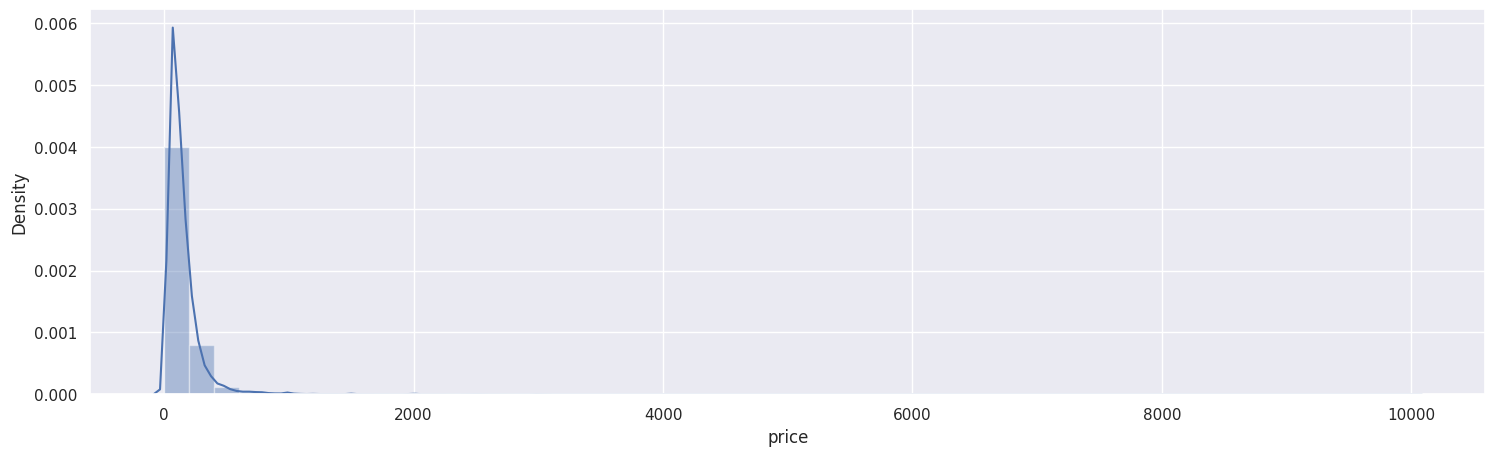

In [21]:
# Dist-plot of price
sns.set(rc={"figure.figsize": (18, 5)})
sns.distplot(df_airbnb['price'],hist=True)

#### Observation:

- The distribution has a positive skew and doesn't deviate from normal distribution.

In [22]:
# Skewness, Kurtosis
print("Skewness: %f" % df_airbnb['price'].skew())
print("Kurtosis: %f" % df_airbnb['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


#### Observation:

- Looks the skewness and kurtosis came out very large. Since the skewness has value greater than 1 it is highly skewed.
- Also kurtosis looks high as well which indicates presence of good amount of outliers.

### Relation bw numerical variables

<Axes: xlabel='minimum_nights', ylabel='price'>

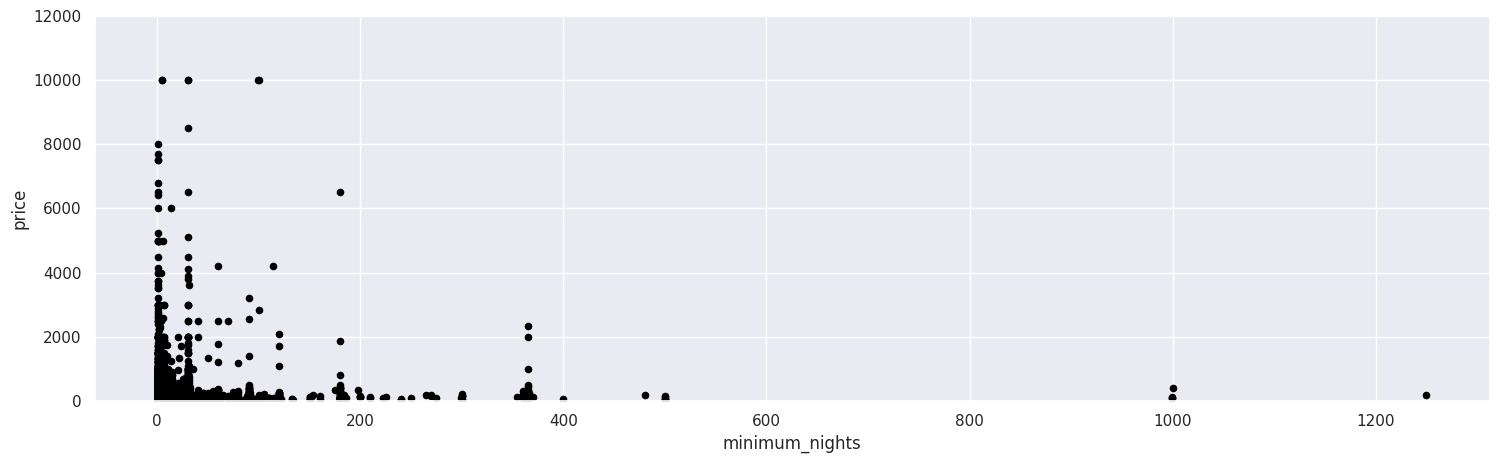

In [24]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([df_airbnb['price'],df_airbnb[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000), color='black')

#### Observation: 
- Many data points are clustured on 0 price, few have minimum nights for stay but price is 0. Hence, looks like anomaly in price and there are many outliers as well.

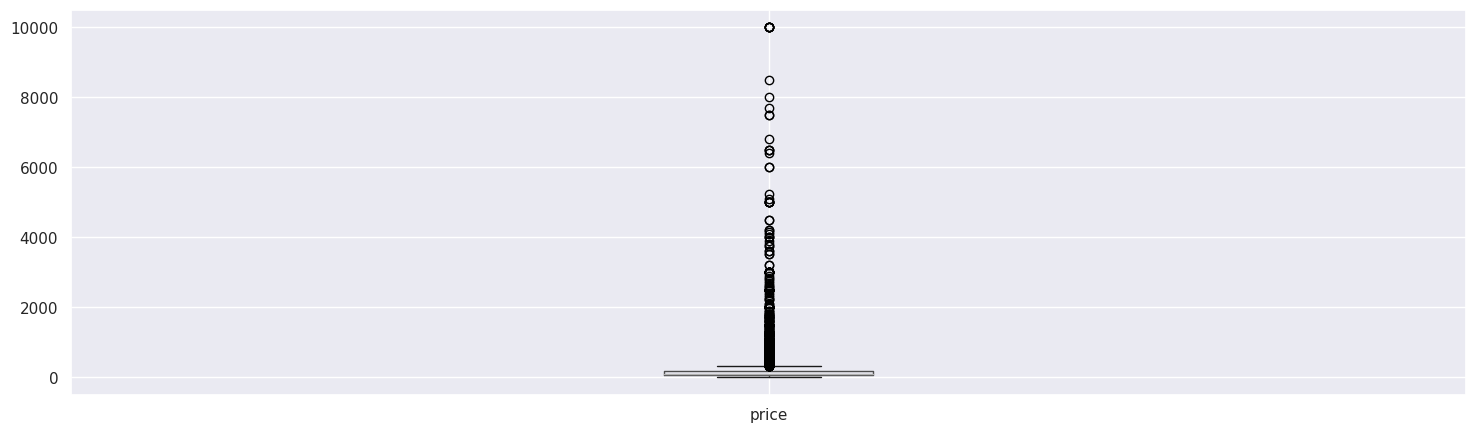

In [25]:
df_airbnb.boxplot(column=['price'])
plt.show()

#### Observation: 

- There is presence of many outliers in price.

In [107]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

### Data Processing

In [108]:
# Checking null values
df_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Missing Values

In [109]:
# As host names are not that important in our analysis, substituting both columns.
df_airbnb['name'].fillna('unknown',inplace=True)
df_airbnb['host_name'].fillna('no_name',inplace=True)

In [110]:
# Checing null value removal
df_airbnb[['host_name','name']].isnull().values.any() 

False

In [111]:
no_of_hosts = df_airbnb['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings = df_airbnb['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47897


In [113]:
# As the column 'last_review' has many null values. And as it is not required for our analysis as compared to number_of_reviews & reviews_per_month we are dropping this column.
df_airbnb = df_airbnb.drop(['last_review'],axis=1)


In [106]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

#### Duplicate data check

In [33]:
duplicate_data = df_airbnb.duplicated()
print(duplicate_data.sum())
df_airbnb[duplicate_data]

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


#### Observation: 

- There's no duplicate data.

In [34]:
# The reviews_per_month column is containing null values and we can simple use 0 reviews to replace NAN's
df_airbnb['reviews_per_month']=df_airbnb['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')
df_airbnb['reviews_per_month'].isnull().values.any()

False

In [35]:
# Top 5 listings on Airbnb in entire NYC:

listings_count_df=df_airbnb['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


#### Observation: 

- Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home

In [36]:
# Top 10 hosts on the basis of no of listings in entire NYC!
top_10_hosts = df_airbnb['host_name'].value_counts()[:10] 
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top 10 hosts based on number of listings in entire NYC!')

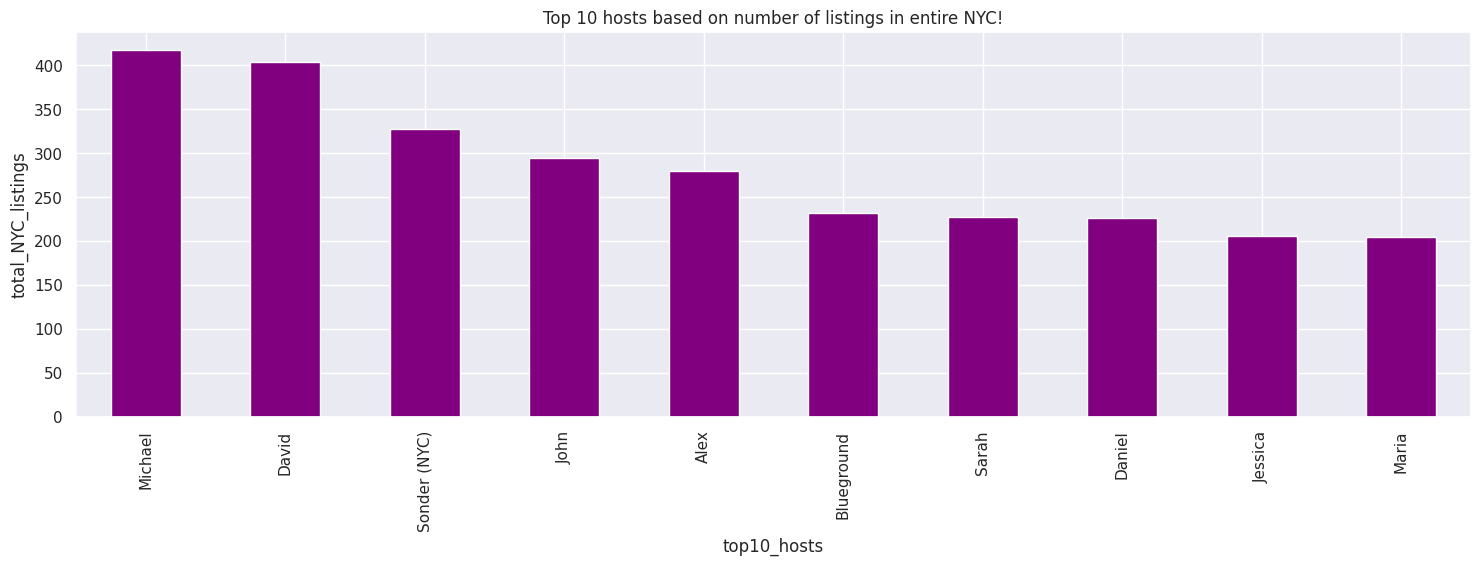

In [37]:
top_10_hosts.plot(kind='bar', color='purple')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('Top 10 hosts based on number of listings in entire NYC!')

#### Observation:

- Host Michael seems to have most number of listings/ properties which is more than 400 followed by david and the 10th host is Maria with around 200 listings.

Text(0.5, 1.0, 'Count of no of properties in entire NYC of each neighbourhood group!')

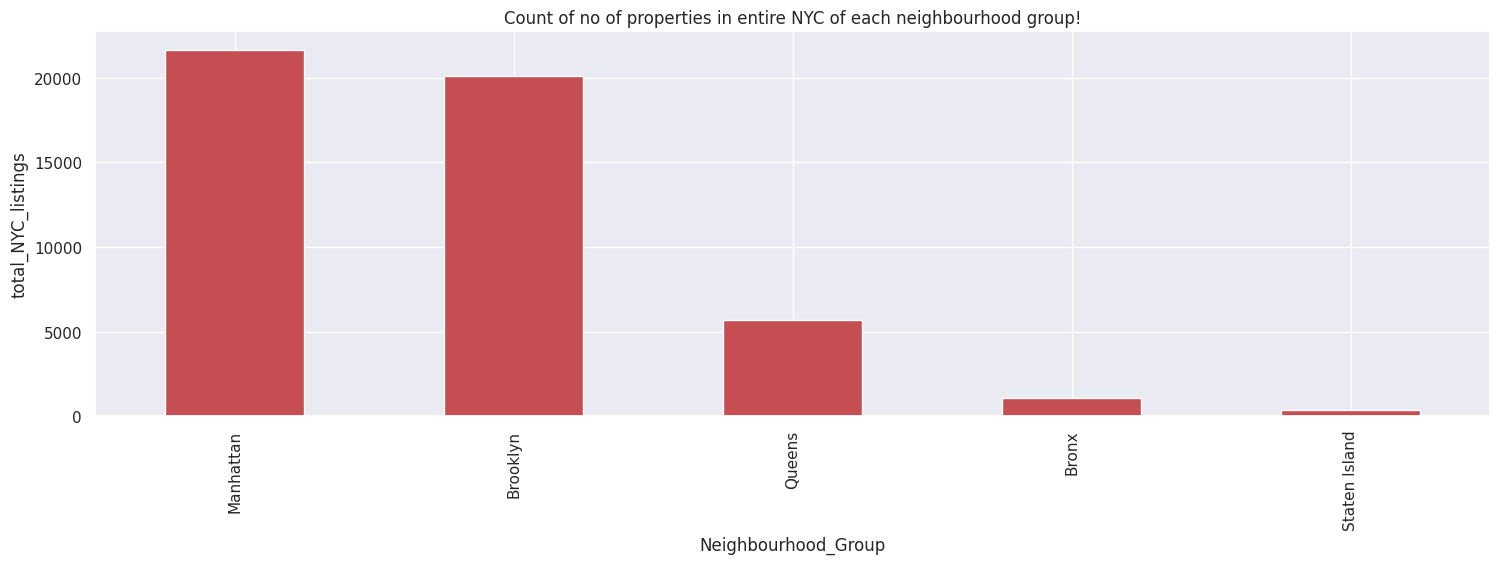

In [40]:
# Checking neighbourhood_group
df_airbnb['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of properties in entire NYC of each neighbourhood group!')




<Axes: ylabel='neighbourhood_group'>

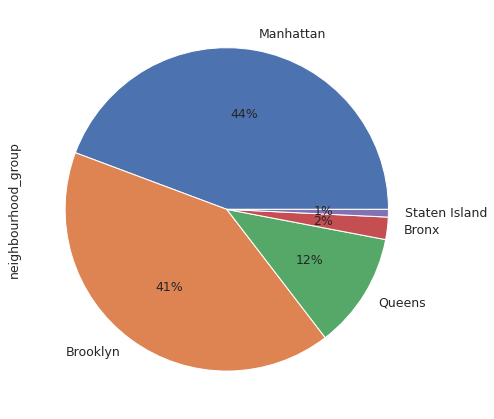

In [41]:
# Checking for share for neighbourhood_group
fig = plt.figure(figsize=(7,7), dpi=75)
df_airbnb['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

#### Observation:

- The neighbourhood group 'Manhattan' has the highest no of listings almost about 44% in entire NYC! 
- Followed by Brooklyn 41%, Queens 12%, Bronx 2% and the least listings are in Staten Island amounting 1%.

In [42]:
# Unique neighbourhood
df_airbnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

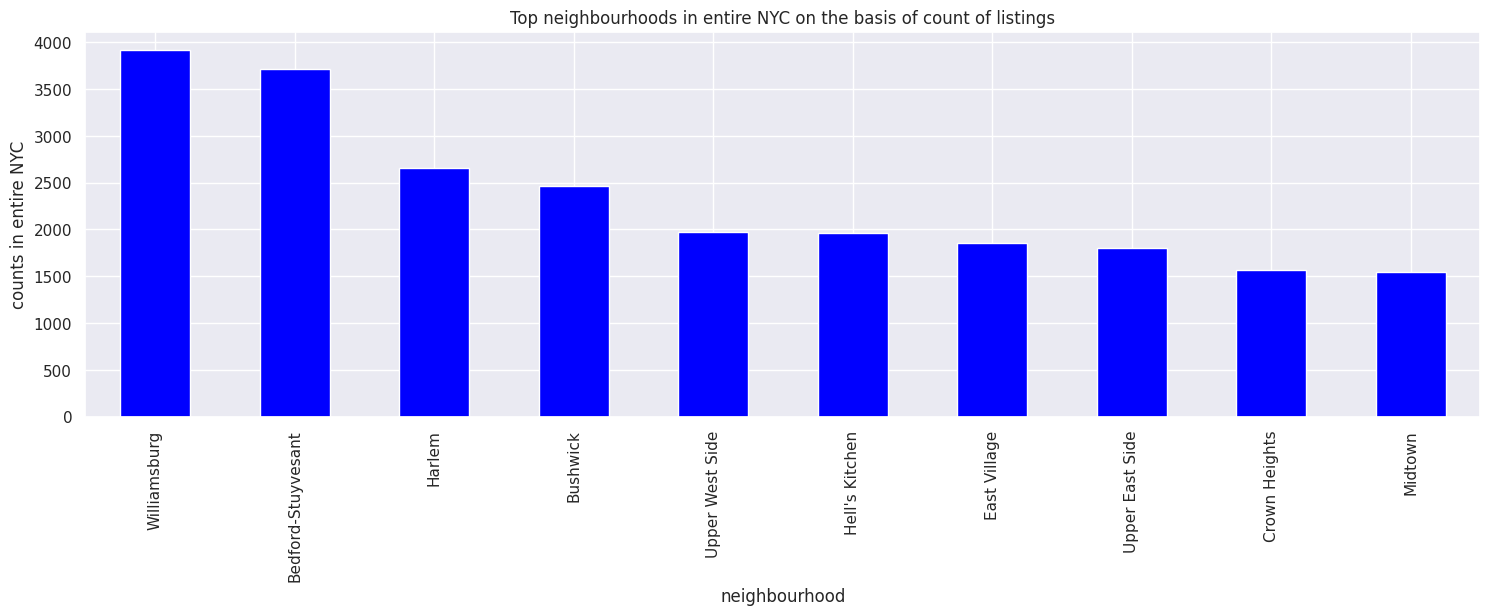

In [43]:
# Checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours= df_airbnb['neighbourhood'].value_counts()[:10]
top_10_neigbours.plot(kind='bar', color='blue')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

<Axes: ylabel='neighbourhood'>

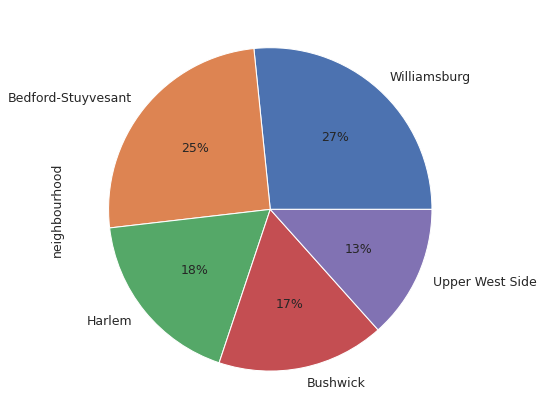

In [44]:
# Checking top 5 popular neighbourhood
fig = plt.figure(figsize=(7,7), dpi=75)
df_airbnb['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

#### Observation: 

- The top 5 neighbourhoods are Williamsburg with 27% followed by Bedford-Stuyvesant with 25%, Harlem with 18%, Bushwick with 17% and Upperwest side with 13%.

<Axes: ylabel='room_type'>

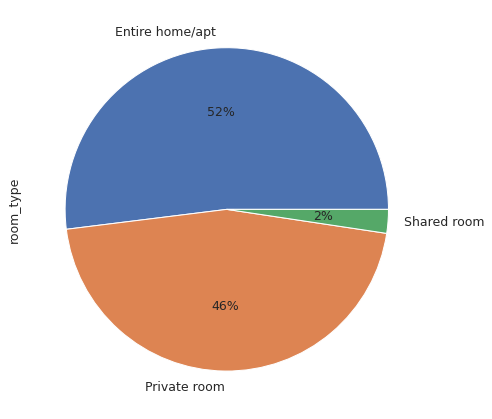

In [45]:
# Room_type distribution
fig = plt.figure(figsize=(7,7), dpi=75)
df_airbnb['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

#### Observation:

- Most room types are Entire home/apt with 52% followed by private room at 46% and shared room being the least with 2% distribution.

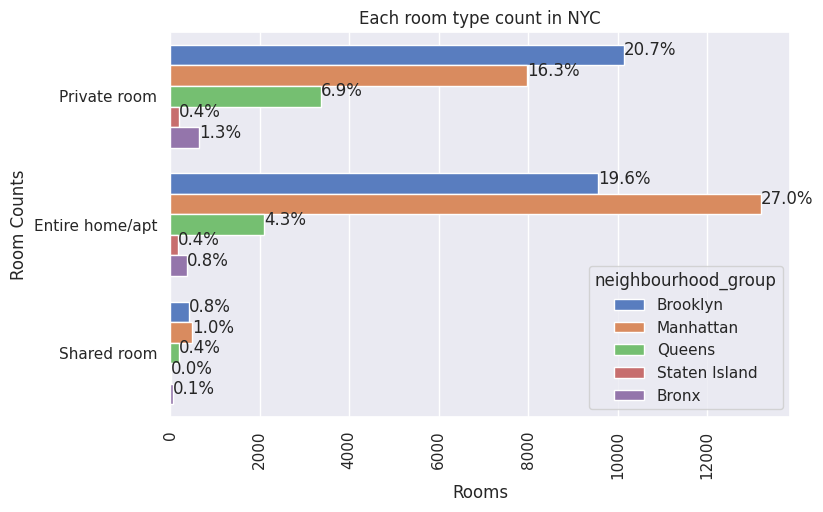

In [46]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_airbnb, palette='muted')

total = len(df_airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Each room type count in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

#### Observation:

- Manhattan has more listed properties with home/apartment around 27% of total listed properties followed by Brooklyn with around 19.6%.

- Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

- Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

- We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

#### Distribution of properties with availability

<ipython-input-51-c07ae1988d4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb['availability_365'], color='violet')


<Axes: xlabel='availability_365', ylabel='Density'>

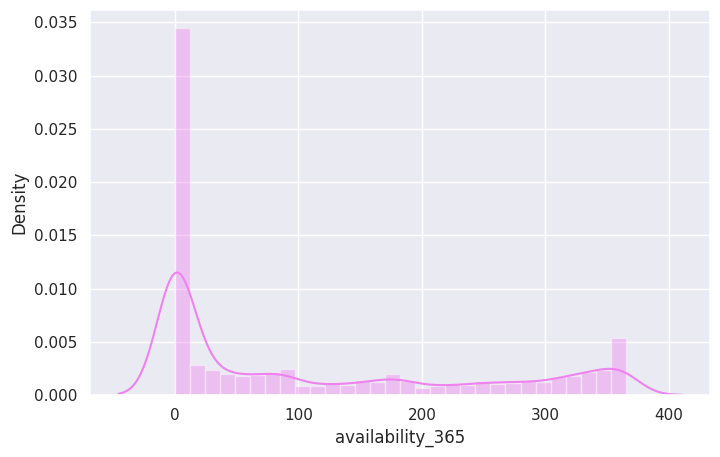

In [51]:
# Distribution of properties with availability
sns.distplot(df_airbnb['availability_365'], color='violet')


#### Observation: 

- availability_365 has a uniform distribution with availability ranging from 0 to 370

- The distribution looks slighly skewed towards right / moderately skewed as per the skewness value ranging betwee 0.5 to 0.1

- The distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below

In [52]:
#skewness and kurtosis
print("Skewness: %f" % df_airbnb['availability_365'].skew())
print("Kurtosis: %f" % df_airbnb['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


<Axes: ylabel='Frequency'>

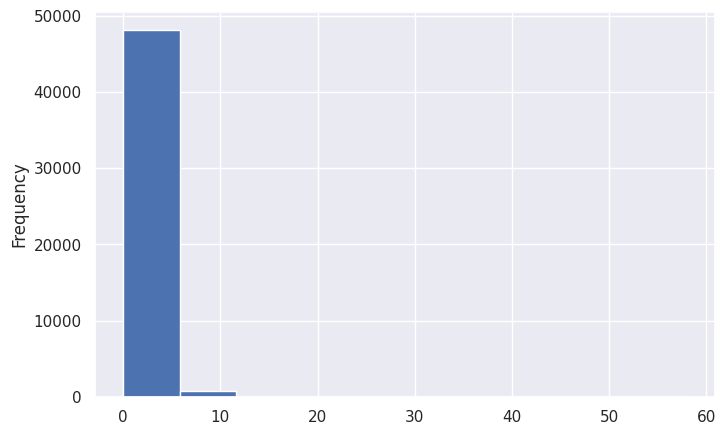

In [53]:
# reviews or month distribution of properties in NYC
df_airbnb['reviews_per_month'].plot.hist()

<ipython-input-56-54f1423128c8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb['reviews_per_month'], color='orange')


<Axes: xlabel='reviews_per_month', ylabel='Density'>

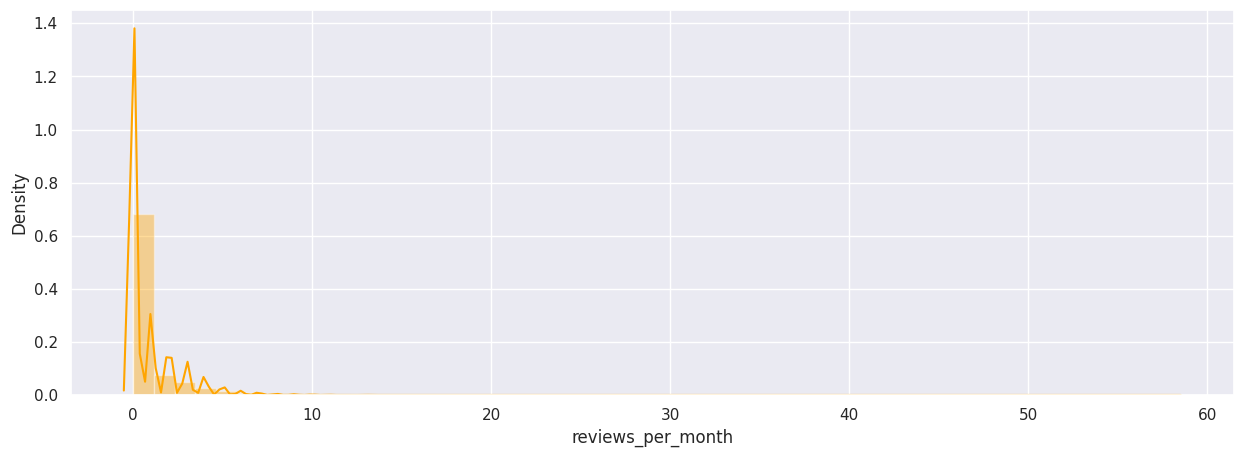

In [56]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_airbnb['reviews_per_month'], color='orange')

#### Observation:

- Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

- Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [57]:
#skewness and kurtosis
print("Skewness: %f" % df_airbnb['reviews_per_month'].skew())
print("Kurtosis: %f" % df_airbnb['reviews_per_month'].kurt())

Skewness: 3.751642
Kurtosis: 54.337612


#### Observation:

- Both skewness and kurtosis are much high which indicates presence of large amount of outliers.

#### Handling outliers

<Axes: >

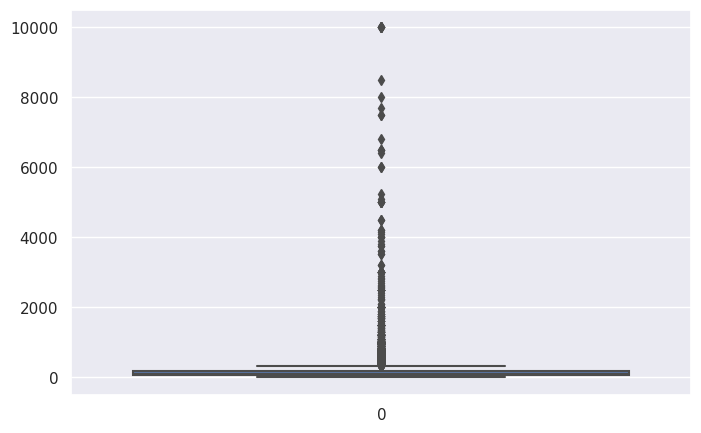

In [58]:
sns.boxplot(df_airbnb['price'])

In [59]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [60]:
# Using quantile approach to remove outliers
min_threshold,max_threshold= df_airbnb.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [61]:
 #prices less than min threshold!
df_airbnb[df_airbnb.price<min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [62]:
# Extreme price value above max_threshold
df_airbnb[df_airbnb.price > max_threshold] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [63]:
df_airbnb_pw = df_airbnb[(df_airbnb.price > min_threshold)&(df_airbnb.price < max_threshold)]

<ipython-input-65-f8b44158aaac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb_pw['price'], color='g')


<Axes: xlabel='price', ylabel='Density'>

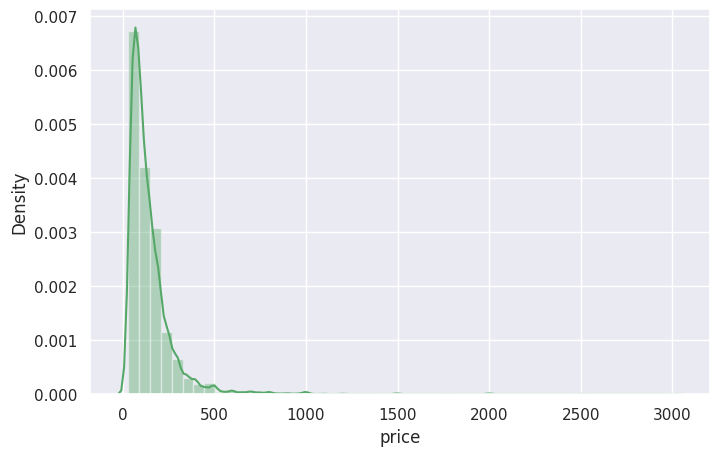

In [65]:
sns.distplot(df_airbnb_pw['price'], color='g')

<Axes: >

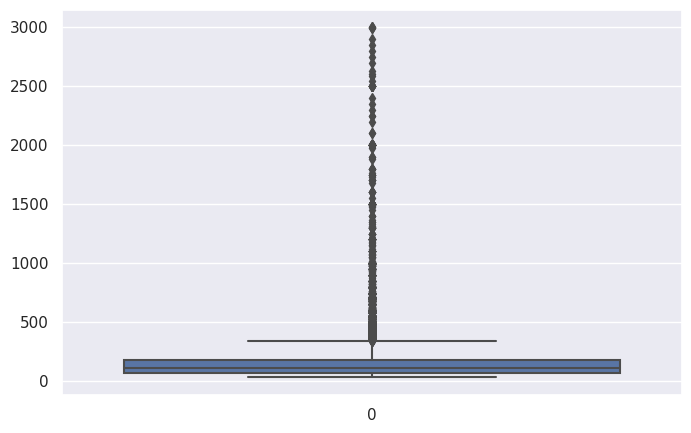

In [64]:
sns.boxplot(df_airbnb_pw['price'])

In [66]:
#skewness and kurtosis
print("Skewness: %f" % df_airbnb_pw['price'].skew())
print("Kurtosis: %f" % df_airbnb_pw['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


In [67]:
# Removing outliers using IQR approach
Q1 = df_airbnb.quantile(0.25)
Q3 = df_airbnb.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


<ipython-input-67-fc4db0eec268>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_airbnb.quantile(0.25)
<ipython-input-67-fc4db0eec268>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_airbnb.quantile(0.75)


In [68]:
# Function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range


In [69]:
lower_bound,upper_bound = outlier_treatment(df_airbnb['price'])

In [70]:
# Looking at the low and upper range outliers
df_airbnb[(df_airbnb.price < lower_bound) | (df_airbnb.price > upper_bound)] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [71]:
# Subsetting only rows with datapoints greater than lower range and lesser than upper range respectively
df_airbnb_pnw1 = df_airbnb[(df_airbnb.price>lower_bound) & (df_airbnb.price<upper_bound)]


In [72]:
df_airbnb_pnw1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


<Axes: >

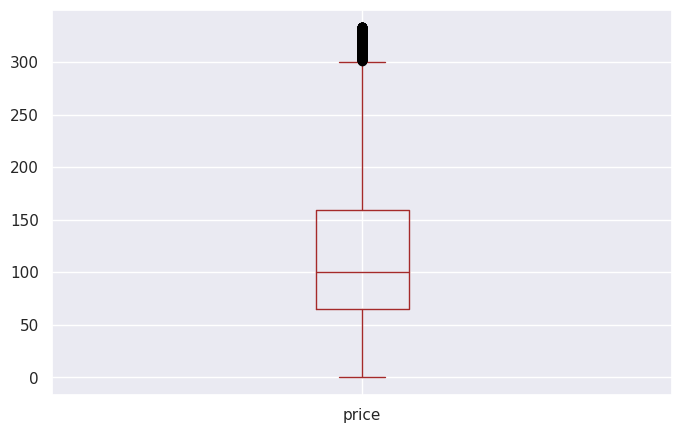

In [74]:
#the boxplot for price now looks good without outliers!
df_airbnb_pnw1.boxplot(column='price', color='brown') 

<ipython-input-75-c86e47b84b26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb_pnw1['price'])


<Axes: xlabel='price', ylabel='Density'>

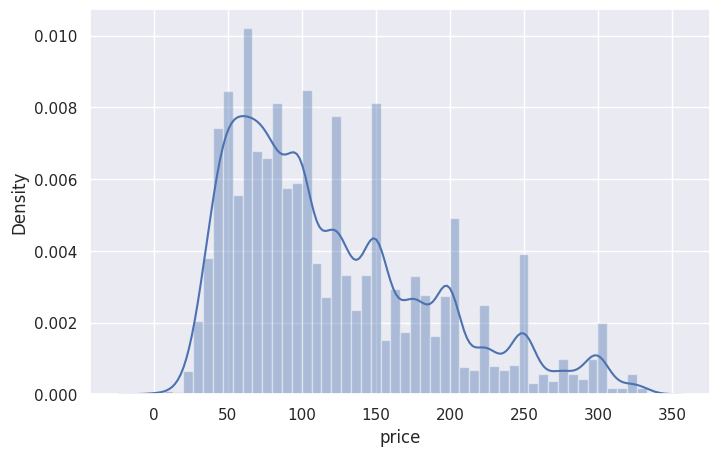

In [75]:
sns.distplot(df_airbnb_pnw1['price'])

### Bi-Variate analysis

#### Correlation matrix

Checking the correlation matrix to understand how are the features are interrelated with each other and also to get an idea which are the most important features in this data.

<ipython-input-77-039a30e2e3b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_airbnb.corr()


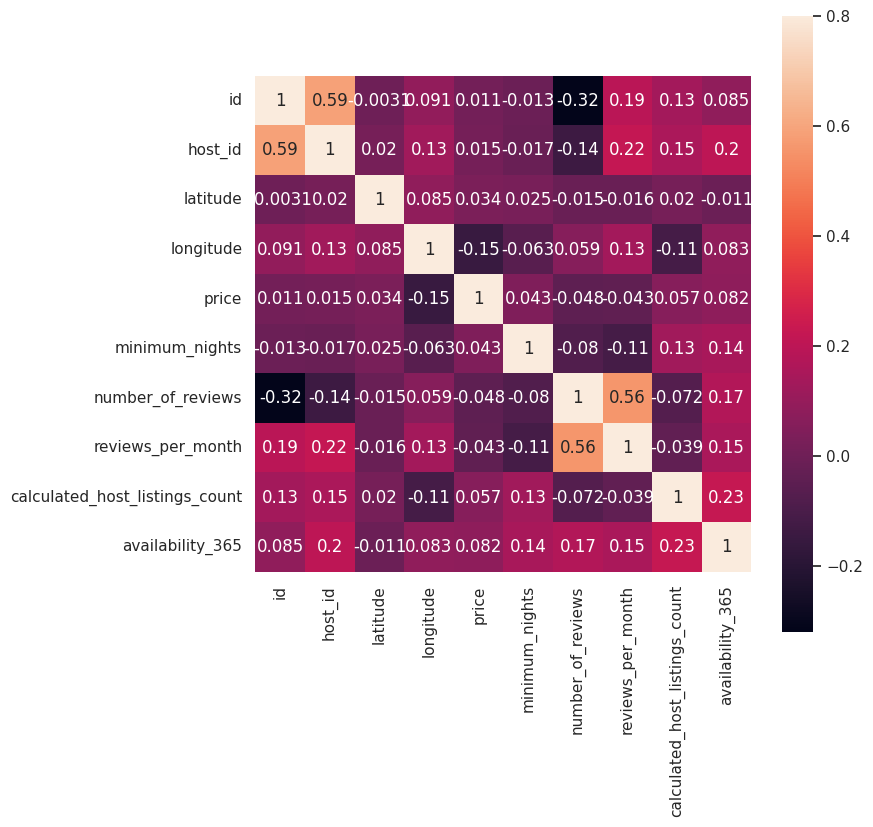

In [77]:
# Correlation matrix
corrmat = df_airbnb.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot= True);

#### Observation: 

- There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365.

- Price also shows some correlation with availability_365 & host_listings_count.

- no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365

In [78]:
# let's understand the distribution of price(without extreme values) along neighbourhood groups
df_airbnb_pnw1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

### Price distribution across Manhattan,Brooklyn,Queens,Bronx & Staten Island

- Instead of checking distributions for each categories one by one we can use a violin plot for getting the overall statistics for each groups and we'll get to know the median of price/neighbourhood group.

- We can do a seaborn point plot to get the average prices/neighbourhood in NYC!

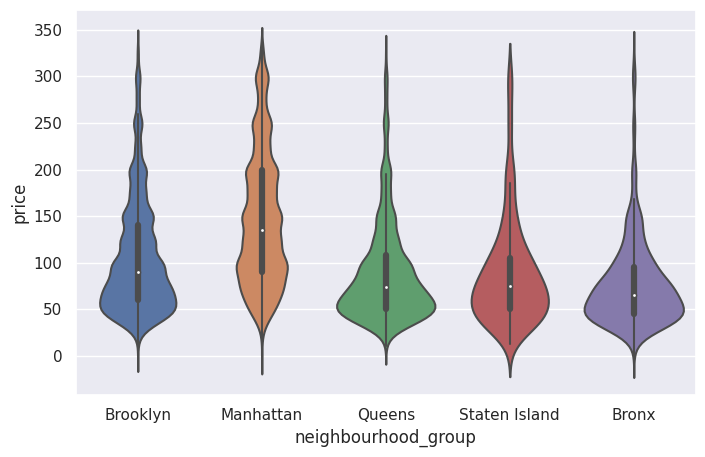

In [79]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_airbnb_pnw1)

#### Observation:

- As usual Manhattan being the most costliest place to live in, having price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

- Queens, Staten Island are on the same page with price on listings.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

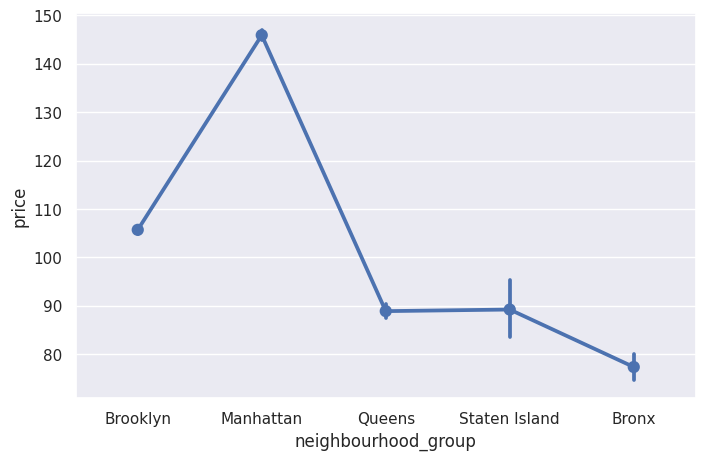

In [80]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_airbnb_pnw1, estimator=mean)

#### Observation:

- We can see that Manhattan has the highest/costliest average of price ranging to ~150dollars per day followed by Brooklyn.

- Queens and Staten Island have same average price per day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

- Let's deep dive into cost of living as it is the most important factor for someone willing to rent or stay using Airbnb.

### Checking the expensive & cheapest properties with respect to prices leading in entire NYC!

In [81]:
# The costliest 5 properties
df_airbnb_pw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt


#### Observation:

- Looks like the all the top 5 costliest listings belongs to Manhattan itself(being the most costliest place of living in NYC).

In [82]:
# The cheapest 5 properties
df_airbnb_pw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room
29967,Large bed room share bathroom,Queens,Elmhurst,Cha,Private room
39100,15 minutes From Times Square!!,Manhattan,Washington Heights,Ari,Private room
28700,Cozy room in Loft Apartment - Brooklyn,Queens,Ridgewood,Estefani,Private room


#### Observation:
- The cheapest listings mostly comes from Brooklyn, Queens and all are private rooms which makes sense.

### Top neighbourhoods in NYC with respect to average price/day of Airbnb properties

In [83]:
# Checking for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

df_nhgrp= df_airbnb_pw.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_nhgrp.loc[df_nhgrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


#### Observation:
- Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely, Fort Wadsworth & Sea Gate, origins from Staten Island & Brooklyn.

- Riverdale from Bronx and Tribeca from Manhattan. Neponsit from Queens.

Text(0, 0.5, 'price')

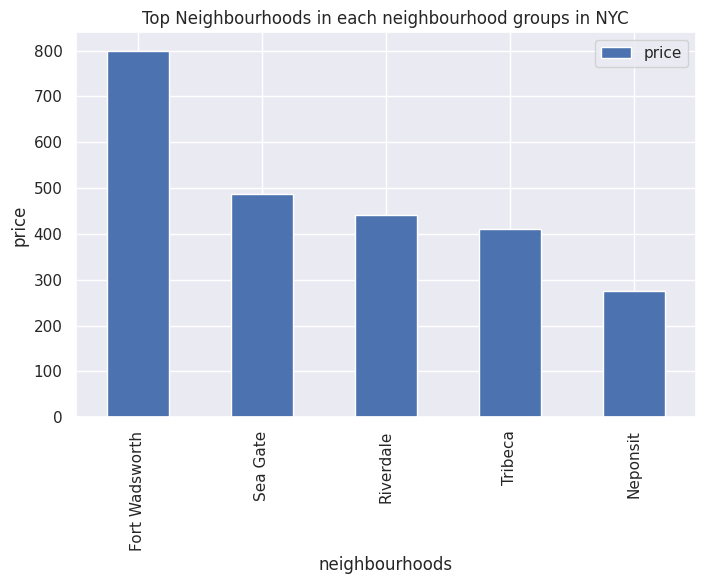

In [84]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

### Checking the costliest listings in each neighbourhood groups & their respective hosts

In [85]:
# Costliest listings in each neighbourhood groups
df_costliest = df_airbnb_pw.loc[df_airbnb_pw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]
df_costliest.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


#### Observation:

- The top 2 costliest listings: LUXURIOUS 5 bedroom, 4.5 bath home & Park Place Townhouse were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

In [86]:
# Also, the cheapest listings in each neighbourhood groups & their respective hosts

df_cheapest = df_airbnb_pw.loc[df_airbnb_pw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]
df_cheapest.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


#### Observation: 
- Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

### Room_types vs price for different neighbourhood groups!

In [87]:
# Unique rooms available throughout NYC
df_airbnb_pw['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<ipython-input-88-ecd4164d0a98>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",


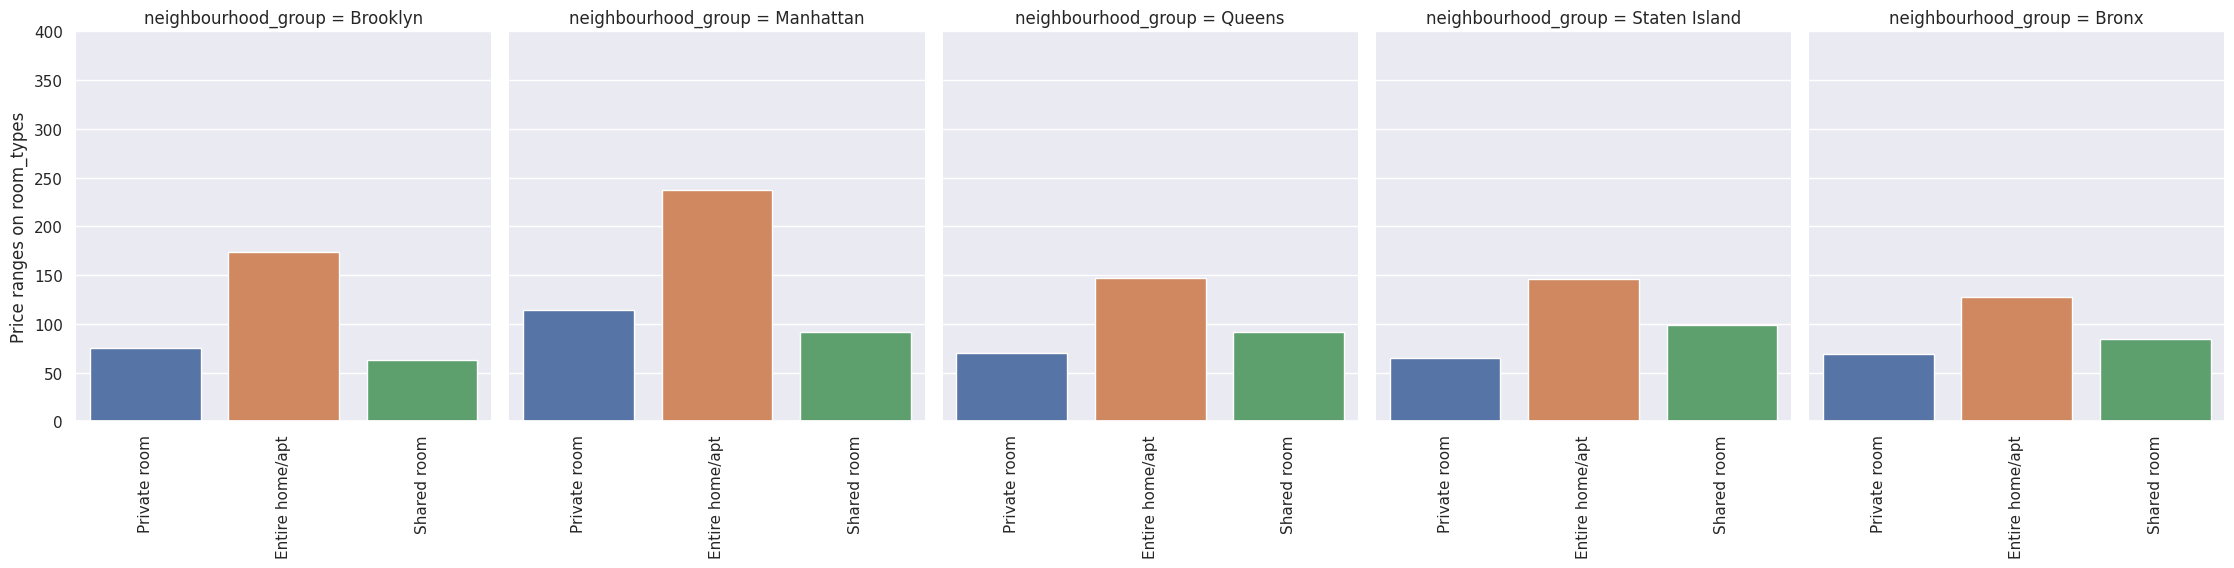

In [88]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_airbnb_pw, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

#### Observation: 

- The property with Entire home/apartment as room_type wins the show at NYC followed by private rooms.

- Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live in!

### On an average for how many nights people stayed in each room_types

Text(0, 0.5, 'Minimum Stays')

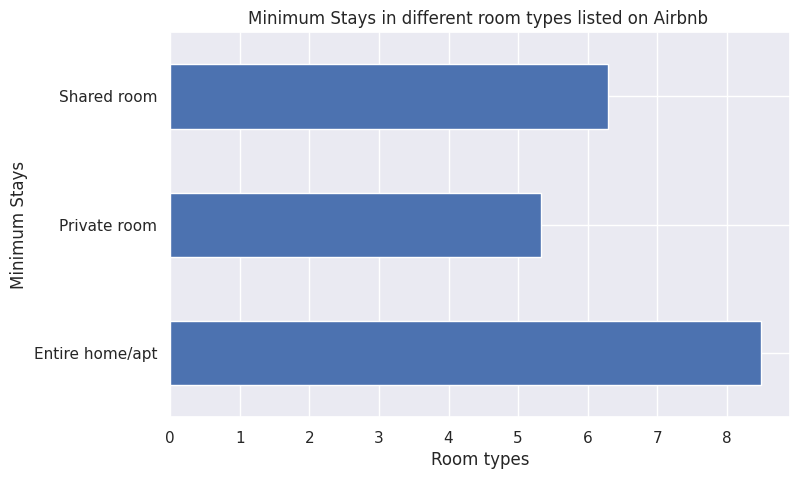

In [89]:
df_airbnb_pw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='b')
plt.title('Minimum Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Minimum Stays')

#### Observation:

- It clearly indicates that people mostly prefer living in an entire home/apartment on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights.

In [90]:
# Top 10 most reviewed properties in NYC!
top10_reviewed_properties = df_airbnb.nlargest(10,'reviews_per_month')
top10_reviewed_properties[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


#### Observation:

- The listings with highest number of reviews, where the highest being: Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.

Text(0.5, 1.0, 'Most Reviewed room types in each Neighbourhood Groups')

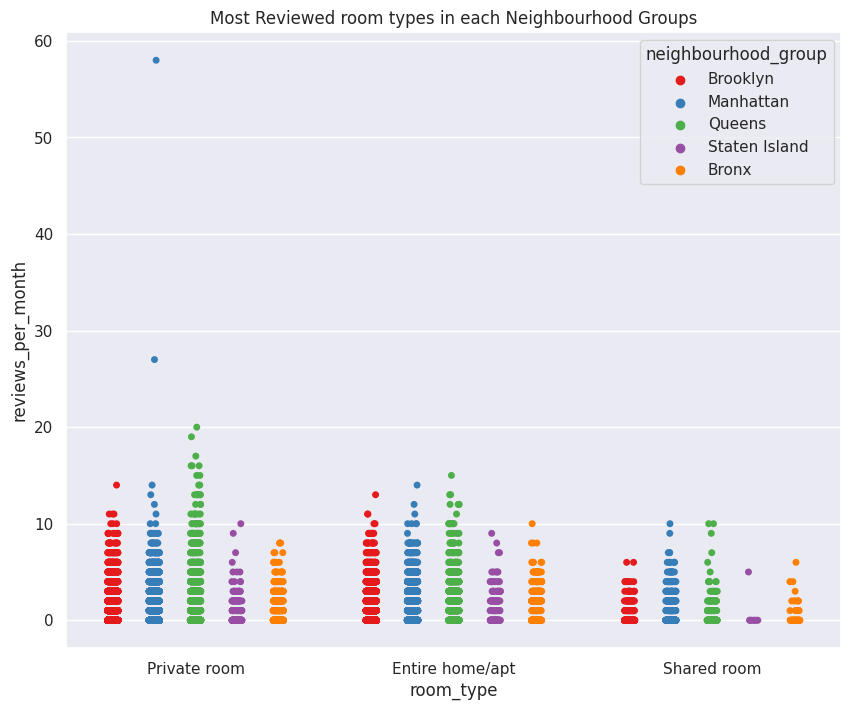

In [91]:
# Lets look how monthly reviews varies with room types in each neighbourhood groups.

f,ax = plt.subplots(figsize = (10,8))
ax = sns.stripplot(x ='room_type',y ='reviews_per_month',hue ='neighbourhood_group',dodge=True,data = df_airbnb,palette ='Set1')
ax.set_title('Most Reviewed room types in each Neighbourhood Groups')

#### Observation: 

- Private rooms recieved the most no of review per month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews per month, followed by Manhattan in the chase.

- Manhattan & Queens got the most no of reviews for Entire home/apartment room type.

- There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

### Finding the top 10 reviewed hosts on the basis of reviews per month.

Text(0.5, 1.0, 'Top 10 Reviews per month received by hosts')

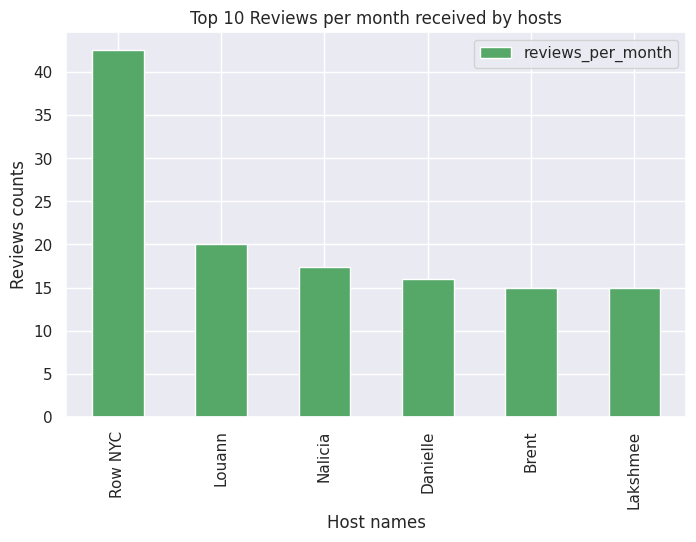

In [92]:
# There are cases where same hosts are hosting multiple properties in same/different areas.
df_reviews = top10_reviewed_properties.groupby('host_name')['reviews_per_month'].mean() 
df_reviews = df_reviews.reset_index().sort_values(by='reviews_per_month',ascending=False)
df_reviews.plot(x='host_name',y='reviews_per_month',kind='bar',color='g')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews per month received by hosts')

#### Observation: 
- Row NYC holds the title as the most reviewed host with more than 40 reviews per month on average.

### Hosts with most number of listings in NYC on the basis of host listings count

In [93]:
host_with_most_listings= df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
df_largest_listings = host_with_most_listings.nlargest(10,'calculated_host_listings_count')
df_largest_listings

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


#### Observation:

- We see that Sonder(NYC) leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara.All 3 of them have their listings on Manhattan.

- We can also check for hosts with most listings in each neighbourhood group.

- The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [94]:
df_hosts = host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[df_hosts].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


#### Observation:

- From above we see that Sonder (NYC), Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

### Room types and their relation with availability in different neighbourhood groups!

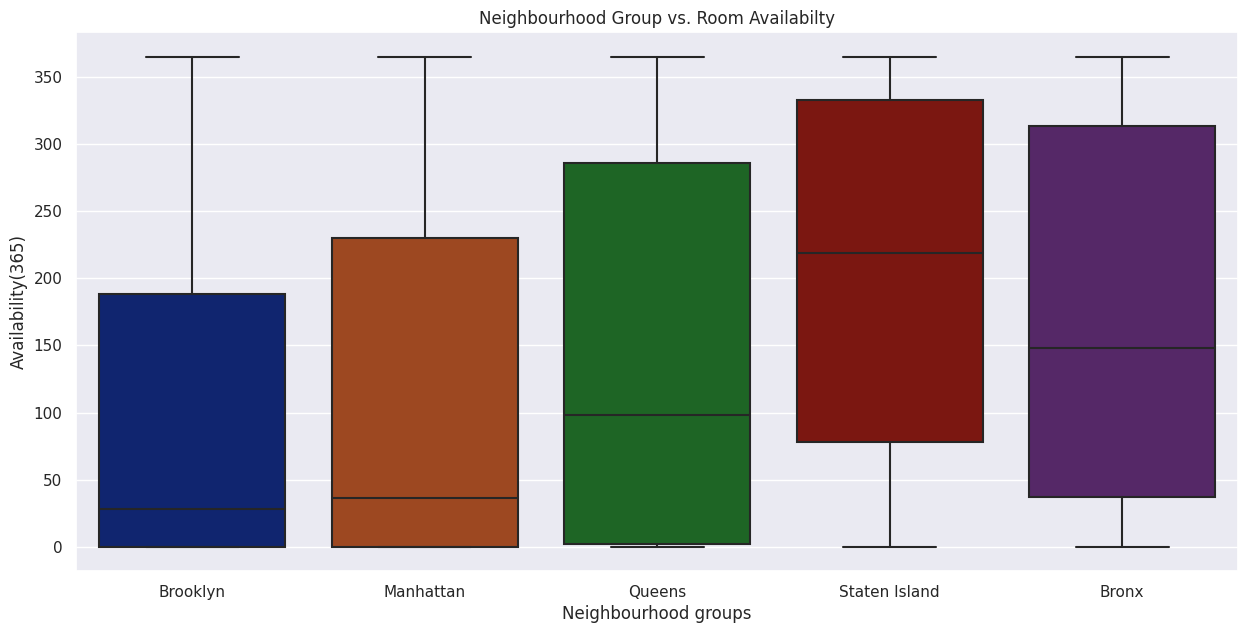

In [98]:
f,ax = plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_airbnb,palette="dark")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

#### Observation:

- From the above categorical box plot we infer that the listings in Staten Island are more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.

### what can be done with latitude and longitude!

Text(0.5, 1.0, 'Location Co-ordinates')

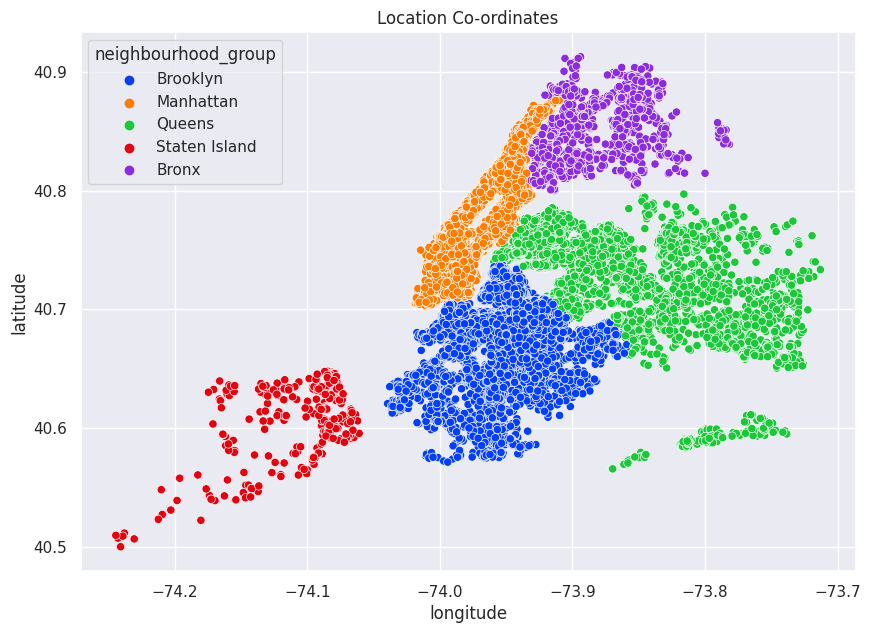

In [99]:
# Trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 7)})
ax= sns.scatterplot(data=df_airbnb_pw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

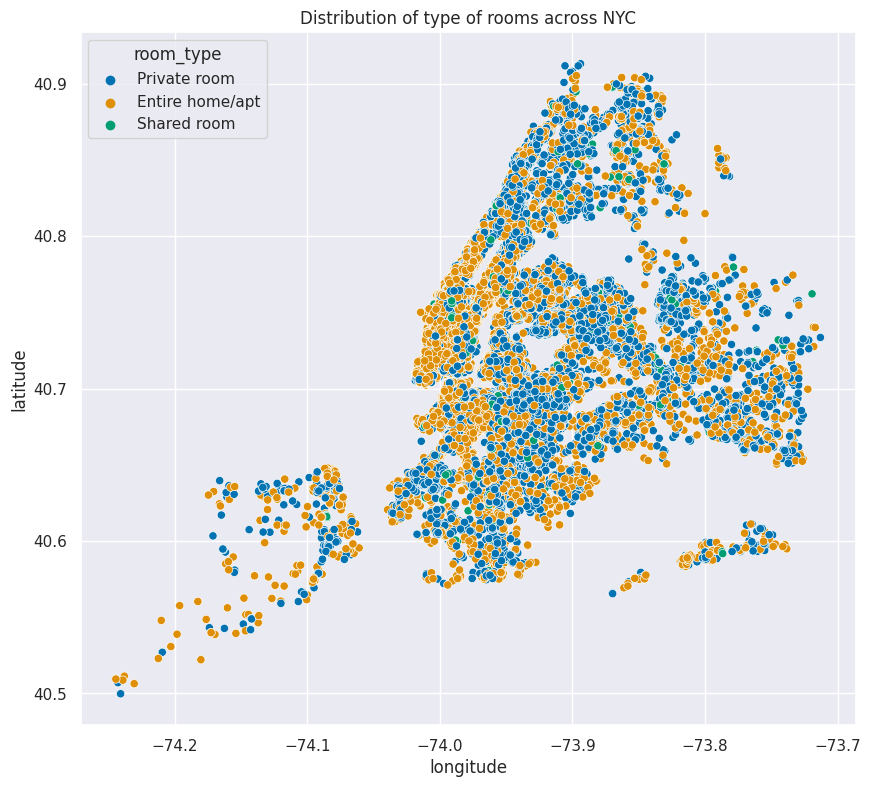

In [100]:
# Observe the type of rooms

sns.set(rc={"figure.figsize": (10, 9)})
ax= sns.scatterplot(x=df_airbnb_pw.longitude, y=df_airbnb_pw.latitude,hue=df_airbnb.room_type,palette='colorblind')
ax.set_title('Distribution of type of rooms across NYC')

#### Observation:

- By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apartment.

- 95% of the listings on Airbnb are either Private room or home/apartment. Very few guests had opted for shared rooms on Airbnb.

- Guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

- Its inferred that there are high range of prices across Manhattan being the most costliest place to stay in NYC.

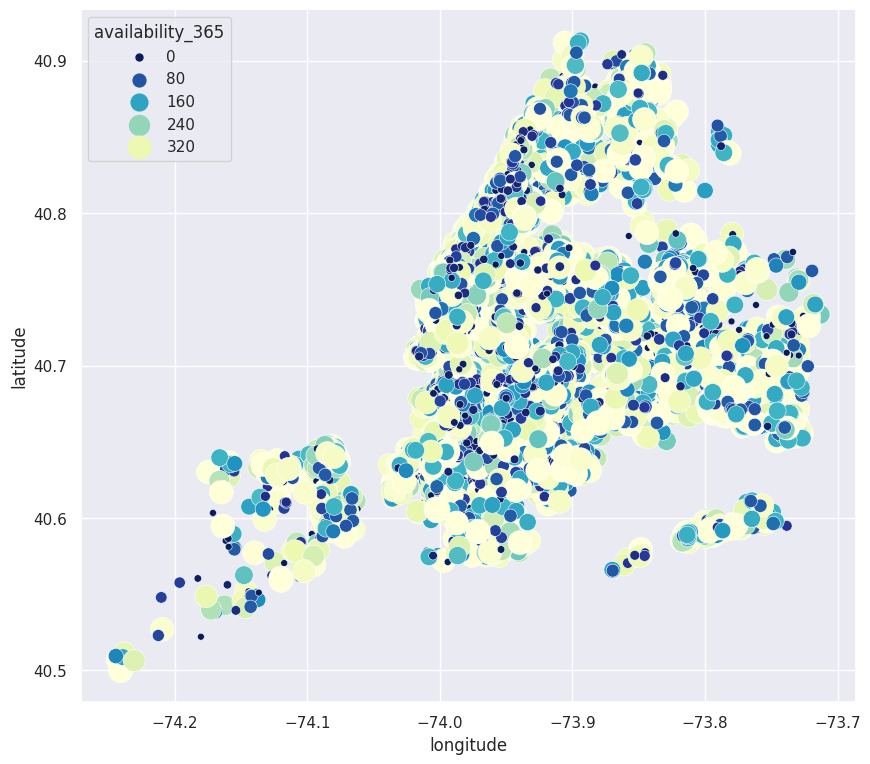

In [101]:
### The listings availability in a year throughout NYC

f, ax = plt.subplots(figsize=(10, 9))
ax=sns.scatterplot(data=df_airbnb_pnw1,x='longitude', y='latitude', hue="availability_365",palette='YlGnBu_r',size='availability_365',
    sizes=(25,300))

#### Observation: 

- Bronx & Staten Island has listings are mostly available throughout the year, and might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

### Conclusion:

We've reached almost the end of the analysis. We analysed the variables, 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. Using Python for this analysis helped us making the conclusion easier. There might be few analysis which can be done more. Below are the insights from the above analysis:

- We found top 10 hosts holding most number of listings/properties. Also, the highest number of listings belong to Manhattan neighbourhood group amounting 44% followed by Brooklyn with 41% while the least number of listings are from Staten Island amounting 1%.

- Most room types are Entire home/apt with 52% followed by private room at 46% and shared room being the least with 2% distribution. 95% of the listings on Airbnb are either Private room or home/apartment. Very few guests had opted for shared rooms on Airbnb. Guests mostly prefer this room types when they are looking for a rent on Airbnb on an average as we found out previously in our analysis.

- We found the top 5 neighbourhoods, Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

- We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

- Manhattan & Queens got the most number of reviews for Entire home/apartment room type. There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

- Staten Island and Bronx have listings which are mostly available throughout the year, and might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

- We can see that Manhattan has the highest/costliest average of price ranging to ~150dollars per day followed by Brooklyn with around 80 USD on an average for the listings. While, Queens and Staten Island are on the same page with price on listings and Bronx comes out to be the cheapest neighbourhood group in NYC.

#### Recommendations:

- More private rooms and entire apartments need to be acquired, especially in Staten Islands due to its popularity.

- Price reduction of entire apartments in Manhattan by at least 15% and increase in price of private rooms in Queens by at least 10%.

- Listings which are most popular have minimum number of nights requirement from 1-5 days and 30 days as maximim number of days. Then, ordering them by properties which are available for most number of days to least will make it easier for the people to select listing. 